### MKT_Final_project  Middle Eastern Video on Demand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preprocessing

In [31]:
sub_df = pd.read_csv('Copy_of_subscribers.csv').drop('Unnamed: 0', axis=1)
sub_df.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True


In [45]:
sub_df['intended_use'].value_counts()
#保存在一个表格里
sub_df['intended_use'].value_counts().to_csv('intended_use.csv')


In [59]:
# 去掉sub_df中age里面的nan
sub_df = sub_df.dropna(subset=['age'])
sub_df['age'].isnull().sum()


0

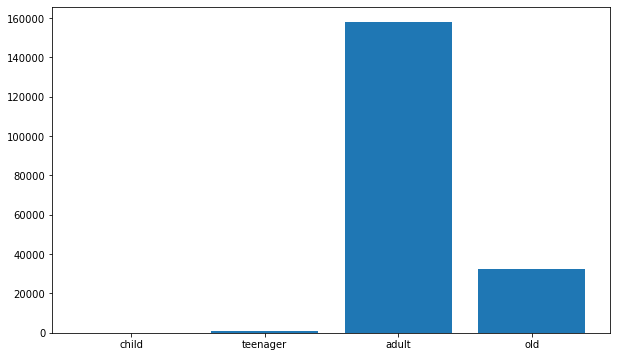

In [80]:
#判断年龄中的异常值
age2 = sub_df['age'][sub_df['age']<=80]

child = sub_df['age'][sub_df['age']<=10]
teenager = sub_df['age'][(sub_df['age']>10) & (sub_df['age']<=18)]
adult = sub_df['age'][(sub_df['age']>18) & (sub_df['age']<=60)]
old = sub_df['age'][(sub_df['age']>60) & (sub_df['age']<=100)]

#画图
plt.figure(figsize=(10,6))
plt.bar(['child','teenager','adult','old'],[len(child),len(teenager),len(adult),len(old)])
plt.show()





In [81]:
print(len(child))
print(len(teenager))
print(len(adult))
print(len(old))



67
1098
157902
32504


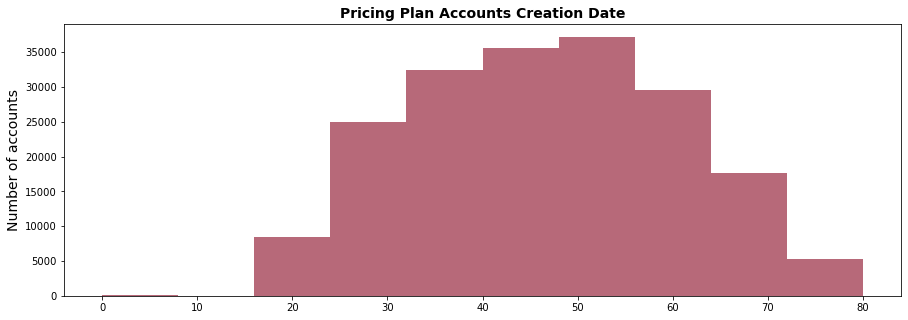

In [72]:
plt.figure(figsize=(15, 5))
age2.hist(bins=10, facecolor="#a54358",alpha=0.8)

# variantA_base_14['account_creation_date'].hist(bins = 5, facecolor="#b08980",alpha=0.8)
plt.title('Pricing Plan Accounts Creation Date',fontsize=14,fontweight='bold')
plt.ylabel("Number of accounts",fontsize=14)
plt.grid(False)
plt.show()

In [51]:
#去掉sub_df['age']中的空值
sub_df['age'] = sub_df['age'].replace(' ', np.nan)
sub_df['age'] = sub_df['age'].dropna()

In [55]:
type(sub_df['age'][0])

numpy.float64

In [43]:

sub_df['age'] = sub_df['age'].astype(int)
sub_df['age'].head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [62]:
sub_df.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'conversion', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed', 'conversion_result'],
      dtype='object')

### AB Testing

In [6]:
sub_df['current_sub_TF'].value_counts()

True     130250
False     97378
Name: current_sub_TF, dtype: int64

In [152]:
sub_df.rename(columns={'current_sub_TF':'conversion'}, inplace=True)
sub_df['conversion'].value_counts()

True     130250
False     97378
Name: conversion, dtype: int64

In [9]:
sub_df['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [10]:
sub_df['country'].value_counts()

UAE    227628
Name: country, dtype: int64

In [46]:
def conversion (row):
    if row['conversion'] == True and row['plan_type'] == 'base_uae_14_day_trial' :
        return "base_convert"
    if row['conversion'] == True and row['plan_type'] == 'high_uae_14_day_trial' :
        return "high_convert"
    if row['conversion'] == True and row['plan_type'] == 'low_uae_no_trial' :
        return "low_convert"

In [47]:
sub_df['conversion_result'] = sub_df.apply (lambda row: conversion (row),axis=1)
sub_df['conversion_result'].value_counts()

base_convert    130009
high_convert       179
low_convert         45
Name: conversion_result, dtype: int64

In [4]:
variantA_base_14['account_creation_date']

0          2020/1/24 21:44
1           2020/3/1 15:44
2          2019/12/7 16:37
3          2020/1/27 16:09
4          2019/10/5 12:57
                ...       
227623    2019/11/17 14:12
227624     2019/12/6 18:02
227625    2019/12/21 19:40
227626     2020/1/17 23:58
227627    2019/11/26 19:09
Name: account_creation_date, Length: 227096, dtype: object

In [30]:
sub_df['male_TF'].value_counts()




False    200902
True      26457
Name: male_TF, dtype: int64

/var/folders/xc/wrkdv3595mq6x6b_yvs2v83c0000gn/T/ipykernel_60905/224720746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variantA_base_14['account_creation_date'] = pd.to_datetime(variantA_base_14['account_creation_date'])


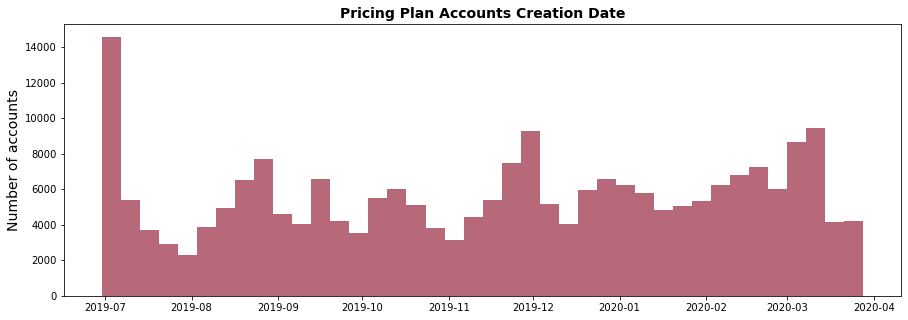

In [23]:
variantA_base_14 = sub_df[sub_df['plan_type'] == 'base_uae_14_day_trial']
variantA_base_14['account_creation_date'] = pd.to_datetime(variantA_base_14['account_creation_date'])
plt.figure(figsize=(15, 5))
variantA_base_14['account_creation_date'].hist(bins=40, facecolor="#a54358",alpha=0.8)

# variantA_base_14['account_creation_date'].hist(bins = 5, facecolor="#b08980",alpha=0.8)
plt.title('Pricing Plan Accounts Creation Date',fontsize=14,fontweight='bold')
plt.ylabel("Number of accounts",fontsize=14)
plt.grid(False)
plt.show()




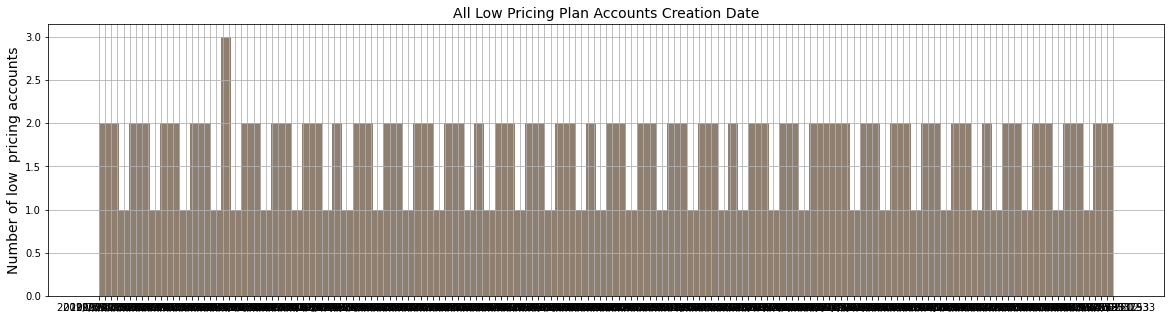

In [10]:
# ALL DATA
# variantA_base_14 = sub_df.loc[sub_df['plan_type'] == 'base_uae_14_day_trial', ['account_creation_date','current_sub_TF']]
variantB_low_0 = sub_df.loc[sub_df['plan_type'] == 'low_uae_no_trial', ['account_creation_date','current_sub_TF']]
# variantC_high_14 = sub_df.loc[sub_df['plan_type'] == 'high_uae_14_day_trial', ['account_creation_date','current_sub_TF']]

# plt.figure(figsize=(20, 5))
# variantA_base_14['account_creation_date'].hist(bins = 5, facecolor="#b08980",alpha=0.8)
# plt.title('All Base Pricing Plan Accounts Creation Date',fontsize=14)
# plt.ylabel("Number of base accounts",fontsize=14)
# plt.show()

plt.figure(figsize=(20, 5))
variantB_low_0['account_creation_date'].hist(bins = 100,facecolor="#5f4933",alpha=0.7)
plt.title('All Low Pricing Plan Accounts Creation Date',fontsize=14)
plt.ylabel("Number of low  pricing accounts",fontsize=14)
plt.show()

# plt.figure(figsize=(20, 5))
# variantC_high_14['account_creation_date'].hist(facecolor="#382914",alpha=0.7)
# plt.title('All High Pricing Plan Accounts Creation Date',fontsize=14)
# plt.ylabel("Number of high pricing accounts",fontsize=14)
# plt.show()

In [6]:
variantB_low_0

,account_creation_date,current_sub_TF
322,2019/7/24 23:20,True
553,2019/7/27 19:57,False
5912,2019/7/28 05:46,True
5958,2019/7/25 00:37,False
7164,2019/7/26 13:28,True
...,...,...
218932,2019/7/24 05:31,True
219037,2019/7/25 02:37,False
219516,2019/7/25 16:19,False
225582,2019/7/25 20:53,False


##### H_0: P_hat = P
##### H_1: P_har > P

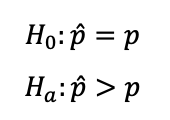

In [26]:
from IPython.display import Image
Image(filename='test.png')

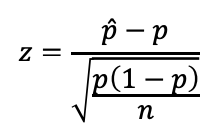

In [25]:
Image(filename='z.png')

##### test high and base

In [48]:
high_p = 130009 / 227096
high_p_hat = 179 / 325
sigma = ((high_p*(1-high_p)/325))**0.5
high_z_score = (high_p_hat-high_p)/sigma
high_z_score

-0.7913241440560812

In [85]:
high_p_value = norm.sf(high_z_score)
high_p_value

0.7856225686281071

##### test low and base

In [51]:
low_p = 130009 / 227096
low_p_hat = 45 / 167
sigma = ((low_p*(1-low_p)/167))**0.5
low_z_score = (low_p_hat-low_p)/sigma
low_z_score

-7.915476206594785

In [87]:
low_p_value = norm.sf(abs(low_z_score))
low_p_value

1.2315424938642588e-15

In [88]:
norm().sf((low_p_hat-low_p)/np.sqrt((low_p*(1-low_p)/167)))

0.9999999999999988

### Allocation and Attribution

In [99]:
spend_df = pd.read_csv('Copy_of_channel_spend_graduate.csv')
spend_df.head(10)

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [61]:
spend_df = spend_df.groupby(['channel']).sum().drop('date', axis=1)
spend_df

,spend_AED
channel,
bing,10800
display,366
facebook,113500
search,222500
youtube,8730


In [64]:
sub_df.conversion

0          True
1          True
2         False
3         False
4          True
          ...  
227623     True
227624     True
227625     True
227626     True
227627    False
Name: conversion, Length: 227628, dtype: bool

In [65]:
sub_df[sub_df.conversion == True]['attribution_technical'].value_counts()

facebook                   41236
search                     16539
email                      14573
organic                    12790
brand sem intent google    10465
google_organic              6904
affiliate                   6081
referral                    4391
pinterest                   3987
email_blast                 3493
facebook_organic            1743
discovery                   1546
other                       1134
brand sem intent bing       1076
podcast                      832
display                      799
youtube                      730
bing                         574
internal                     555
bing_organic                 207
vod                          190
ott                          123
direct_mail                  101
quora                         57
appstore                      38
pinterest_organic             24
influencer                    18
criteo                        16
samsung                       16
playstore                      8
tv        

In [74]:
CACofBing = spend_df.loc['bing']['spend_AED']/sub_df[sub_df.conversion == True]['attribution_technical'].value_counts()['bing']
CACofDisplay = spend_df.loc['display']['spend_AED']/sub_df[sub_df.conversion == True]['attribution_technical'].value_counts()['display']
CACofFacebook = spend_df.loc['facebook']['spend_AED']/sub_df[sub_df.conversion == True]['attribution_technical'].value_counts()['facebook']
CACofSearch = spend_df.loc['search']['spend_AED']/sub_df[sub_df.conversion == True]['attribution_technical'].value_counts()['search']
CACofyoutube = spend_df.loc['youtube']['spend_AED']/sub_df[sub_df.conversion == True]['attribution_technical'].value_counts()['youtube']

In [75]:
print('bing: %.2f'%CACofBing)
print('display: %.2f'%CACofDisplay)
print('facebook: %.2f'%CACofFacebook)
print('organic: %.2f'%CACofSearch)
print('youtube: %.2f'%CACofyoutube)


bing: 18.82
display: 0.46
facebook: 2.75
organic: 13.45
youtube: 11.96


In [109]:
spend_df['total_sub'] = 0
spend_df['total_sub']['bing'] = len(sub_df[sub_df['attribution_technical'] == 'bing'])
spend_df['total_sub']['display'] = len(sub_df[sub_df['attribution_technical'] == 'display'])
spend_df['total_sub']['facebook'] = len(sub_df[sub_df['attribution_technical'] == 'facebook'])
spend_df['total_sub']['search'] = len(sub_df[sub_df['attribution_technical'] == 'search'])
spend_df['total_sub']['youtube'] = len(sub_df[sub_df['attribution_technical'] == 'youtube'])

/var/folders/xc/wrkdv3595mq6x6b_yvs2v83c0000gn/T/ipykernel_53726/459603061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_df['total_sub']['bing'] = len(sub_df[sub_df['attribution_technical'] == 'bing'])
/var/folders/xc/wrkdv3595mq6x6b_yvs2v83c0000gn/T/ipykernel_53726/459603061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_df['total_sub']['display'] = len(sub_df[sub_df['attribution_technical'] == 'display'])
/var/folders/xc/wrkdv3595mq6x6b_yvs2v83c0000gn/T/ipykernel_53726/459603061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [120]:
type(sub_df['account_creation_date'][1])

str

In [133]:
#提取sub_df中的account_creation_date的年份
sub_df['account_creation_date'] = pd.to_datetime(sub_df['account_creation_date'])
sub_df['account_creation_date'] = sub_df['account_creation_date'].dt.month
sub_df['account_creation_date']==7

0         False
1         False
2         False
3         False
4         False
          ...  
227623    False
227624    False
227625    False
227626    False
227627    False
Name: account_creation_date, Length: 227628, dtype: bool

In [140]:
sub_df['account_creation_date']

0        1970-01-01 00:00:00.000000001
1        1970-01-01 00:00:00.000000001
2        1970-01-01 00:00:00.000000001
3        1970-01-01 00:00:00.000000001
4        1970-01-01 00:00:00.000000001
                      ...             
227623   1970-01-01 00:00:00.000000001
227624   1970-01-01 00:00:00.000000001
227625   1970-01-01 00:00:00.000000001
227626   1970-01-01 00:00:00.000000001
227627   1970-01-01 00:00:00.000000001
Name: account_creation_date, Length: 227628, dtype: datetime64[ns]

In [161]:
def counting(year, month, sub_df):
    sub_df['account_creation_date1'] = pd.to_datetime(sub_df['account_creation_date'])
    total = sub_df[(sub_df['account_creation_date1'].dt.month == month) & (sub_df['account_creation_date1'].dt.year == year)]
    he=total[total['conversion']==True]
    print('For year %s, month %s, total user = %d, subscriber = %d'%(year, month, len(total), len(he)))
    print('For year %s, month %s, converion_rate = %f'%(year, month, len(he)/len(total)))
    # subscriber = sum((sub_df['conversion'] == True) & (sub_df['account_creation_date'].dt.month == month) & (sub_df['account_creation_date'].dt.year == year))
    # print('For year %s, month %s, total user = %d, subscriber = %s'%(year, month, total, subscriber))

In [162]:
counting(2019,12,sub_df)
counting(2019,8,sub_df)
counting(2019,9,sub_df)
counting(2019,10,sub_df)
counting(2019,11,sub_df)
counting(2019,12,sub_df)
counting(2020,1,sub_df)
counting(2020,2,sub_df)

For year 2019, month 12, total user = 25339, subscriber = 17215
For year 2019, month 12, converion_rate = 0.679388
For year 2019, month 8, total user = 25434, subscriber = 11365
For year 2019, month 8, converion_rate = 0.446843
For year 2019, month 9, total user = 20190, subscriber = 11111
For year 2019, month 9, converion_rate = 0.550322
For year 2019, month 10, total user = 22412, subscriber = 13507
For year 2019, month 10, converion_rate = 0.602668
For year 2019, month 11, total user = 26828, subscriber = 17606
For year 2019, month 11, converion_rate = 0.656255
For year 2019, month 12, total user = 25339, subscriber = 17215
For year 2019, month 12, converion_rate = 0.679388
For year 2020, month 1, total user = 24843, subscriber = 16798
For year 2020, month 1, converion_rate = 0.676166
For year 2020, month 2, total user = 28089, subscriber = 18524
For year 2020, month 2, converion_rate = 0.659475


In [163]:
17215/25339

0.6793875054264178

# Churn

In [177]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = 25

In [181]:
churn_df = pd.read_csv('Copy_of_subscribers.csv')
churn_df.head(10)

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,...,2020/2/7 21:44,False,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,...,2020/3/15 15:44,False,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,2019/12/21 16:37,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,...,2020/2/10 16:09,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,...,2019/10/19 12:57,False,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,...,2020/3/17 20:15,False,0.3303,ar,RAKBANK,14,True,1,2020/3/17 20:15,2020/7/17 20:15,NaN,True
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,...,2020/3/4 18:30,False,0.3303,ar,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True
7,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,...,2020/3/19 14:52,False,0.0000,ar,RAKBANK,14,True,1,2020/3/19 14:52,2020/7/19 14:52,NaN,True
8,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,...,2020/3/8 17:50,False,0.6606,ar,NaN,14,True,1,2020/3/8 17:50,2020/7/8 17:50,NaN,True
9,681969,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,UAE,search,...,2020/2/4 14:17,False,0.3303,ar,NaN,14,False,0,NaN,NaN,2020/1/27 00:00,False


In [ ]:
# select parameters useful and predictable
df_churn = df[['package_type', 'num_weekly_services_utilized', 'preferred_genre', 'intended_use', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF', 'country', 'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type', 'monthly_price', 'discount_price', 'join_fee', 'language', 'num_trial_days', 'payment_period','conversion']]

In [182]:
churn_df.drop(['Unnamed: 0','months_per_bill_period','account_creation_date','trial_end_date','payment_period',\
         'initial_credit_card_declined','last_payment','next_payment','cancel_date'],\
       axis = 1,inplace=True)

In [184]:
eng_df = pd.read_pickle ('engagement')
eng_df.drop(['payment_period','date'],axis = 1,inplace=True)
eng_df = eng_df.groupby(by="subid").sum()
churn_df = pd.merge(churn_df, eng_df, left_on='subid', right_on='subid', how='left')

In [185]:
churn_df.head(10)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,...,NaN,ar,Standard Charter,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,...,0.3303,ar,NaN,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,...,0.1101,ar,NaN,14,False,True,2.0,2.0,13.0,13.0,0.0,1.0
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,...,0.0367,ar,NaN,14,False,True,NaN,NaN,NaN,NaN,NaN,NaN
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,...,0.0367,ar,NaN,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,tv,...,0.3303,ar,RAKBANK,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN
6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,search,...,0.3303,ar,Standard Charter,14,True,True,40.0,17.0,182.0,182.0,6.0,39.0
7,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,referral,...,0.0000,ar,RAKBANK,14,True,True,104.0,10.0,84.0,206.0,0.0,29.0
8,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,facebook,...,0.6606,ar,NaN,14,True,True,3.0,3.0,2.0,13.0,0.0,0.0
9,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,UAE,search,facebook,...,0.3303,ar,NaN,14,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
age_median = churn_df['age'].median()

churn_df['age'] = churn_df.age.apply(lambda x: age_median if x > 80 else x)
churn_df = churn_df.loc[(churn_df["plan_type"] == "base_uae_14_day_trial")|
            (churn_df["plan_type"] == "high_uae_14_day_trial")|
            (churn_df["plan_type"] == "low_uae_no_trial"),:]

churn_df['churn_TF'] = churn_df.current_sub_TF.apply(lambda x: 1 if x == False else 0)
churn_df.drop('current_sub_TF',axis = 1,inplace=True)
churn_df = churn_df.fillna(0)

In [187]:
churn_df.isnull().sum()

subid                              0
package_type                       0
num_weekly_services_utilized       0
preferred_genre                    0
intended_use                       0
weekly_consumption_hour            0
num_ideal_streaming_services       0
age                                0
male_TF                            0
country                            0
attribution_technical              0
attribution_survey                 0
op_sys                             0
plan_type                          0
monthly_price                      0
discount_price                     0
join_fee                           0
language                           0
payment_type                       0
num_trial_days                     0
trial_completed                    0
app_opens                          0
cust_service_mssgs                 0
num_videos_completed               0
num_videos_more_than_30_seconds    0
num_videos_rated                   0
num_series_started                 0
c

In [261]:
churn_df_test ['price_diff'] = churn_df_test ['monthly_price'] - churn_df_test ['discount_price']
churn_df_test ['price_diff'].value_counts()

0.2202    68109
0.0734      109
0.0367       59
Name: price_diff, dtype: int64

In [263]:
churn_df_test ['monthly_price'].value_counts()

4.7343    68109
5.1013      109
1.0643       59
Name: monthly_price, dtype: int64

In [191]:
# split
churn_df_train, churn_df_test = model_selection.train_test_split(churn_df, test_size=0.3, random_state=100)

y_train = churn_df_train['churn_TF']
x_train = churn_df_train.drop('churn_TF',axis = 1)
y_test = churn_df_test['churn_TF']
x_test = churn_df_test.drop('churn_TF',axis = 1)

In [253]:
numeric_features

['subid',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'monthly_price',
 'discount_price',
 'join_fee',
 'num_trial_days',
 'trial_completed',
 'app_opens',
 'cust_service_mssgs',
 'num_videos_completed',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started']

In [254]:
categorical_features

['package_type',
 'preferred_genre',
 'intended_use',
 'male_TF',
 'country',
 'attribution_technical',
 'attribution_survey',
 'op_sys',
 'plan_type',
 'language',
 'payment_type']

In [192]:
# display numerical variables
numeric_features = list(x_train.columns[x_train.dtypes != object])

# display categorical variables
categorical_features = list(x_train.columns[x_train.dtypes == object])

# split categorical_features and numeric_features
x_train_cat = x_train.loc[:,categorical_features].astype('str') 
x_train_num = x_train.loc[:,numeric_features]

x_test_cat =  x_test.loc[:,categorical_features].astype('str')
x_test_num = x_test.loc[:,numeric_features]

# one-hot encoding for categorical variables
one_hot = OneHotEncoder(sparse=False)
x_train_cat = pd.DataFrame(one_hot.fit_transform(x_train_cat))
x_test_cat = pd.DataFrame(one_hot.transform(x_test_cat))

# normalize numerical features
scaler = MinMaxScaler()
x_train_num = pd.DataFrame(scaler.fit_transform(x_train_num))
x_test_num = pd.DataFrame(scaler.transform(x_test_num))

x_train_scale = pd.concat([x_train_cat,x_train_num],axis=1)
x_test_scale =  pd.concat([x_test_cat,x_test_num],axis=1)

In [193]:
log_reg = LogisticRegression(random_state=22)
log_reg.fit(x_train_scale,y_train)

lr_predictions = log_reg.predict(x_test_scale)
lr_predictions_probs = log_reg.predict_proba(x_test_scale)[:, 1]
lr_auc = roc_auc_score(y_test, lr_predictions_probs)
print('Model auc: {0:0.6f}'.format(lr_auc))
print('Model accuracy score: {0:0.6f}'.format(accuracy_score(y_test, lr_predictions)))

Model auc: 0.946568
Model accuracy score: 0.874379


/Users/liujingyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


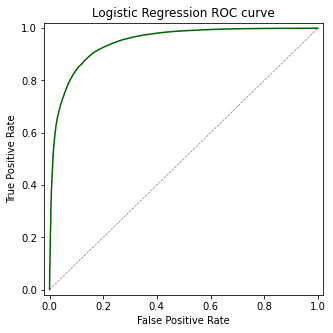

In [194]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, lr_predictions_probs)
plt.plot(fpr, tpr, color='darkgreen')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC curve')

plt.show()

In [195]:
x_train_new = pd.concat([x_train_cat,x_train_num],axis=1)
x_test_new =  pd.concat([x_test_cat,x_test_num],axis=1)

In [196]:
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(x_train_new,y_train)

y_pred_test = log_reg.predict(x_test_new)

y_pred_proba = log_reg.predict_proba(x_test_new)[:, 1]

In [198]:
y_train = y_train.reset_index()['churn_TF']
y_test = y_test.reset_index()['churn_TF']

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(x_train_new,y_train)

y_pred_test = log_reg.predict(x_test_new)

y_pred_proba = log_reg.predict_proba(x_test_new)[:, 1]

In [239]:
prob_churn_logit = y_pred_proba

In [240]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=y_train, exog=x_train_new)
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2225.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:10:00   Log-Likelihood:                -50045.
No. Observations:              159311   AIC:                         1.003e+05
Df Residuals:                  159222   BIC:                         1.012e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.008e+

In [243]:
prob_churn_lpm = lpm_results.predict(x_test_new)

In [244]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


In [245]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives


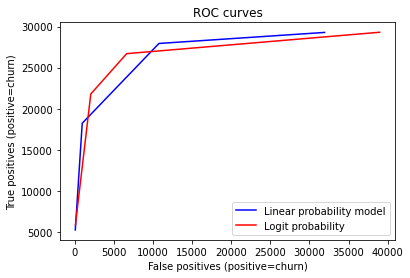

In [208]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(y_test, prob_churn_logit)
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(y_test, prob_churn_lpm)
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

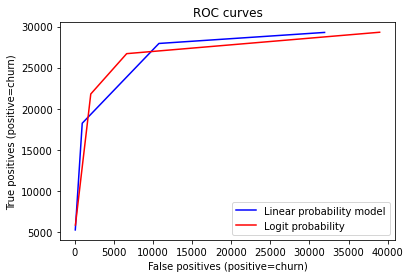

In [230]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
# logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(y_test, prob_churn_logit)
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(churn_df_test['churn_TF'], churn_df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(y_test, prob_churn_lpm)
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [212]:
auc_logit = roc_auc_score(y_test, prob_churn_logit)
auc_lpm = roc_auc_score(y_test, prob_churn_lpm)

In [213]:
auc_logit

0.9465694809296643

In [214]:
auc_lpm

0.9434522940929434

In [249]:

churn_df_test['prob_churn_lpm'] = prob_churn_lpm
churn_df_test['prob_churn_logit'] = prob_churn_logit
# churn_df_test['churn_TF'] = churn_df_test['conversion']

In [250]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = churn_df['monthly_price'].median()
discount_amount = 0.05
cases = ['no_offer', 'logit_offer', 'lpm_offer']

In [251]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
churn_df_test['random_draws'] = np.random.random(churn_df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(churn_df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind


# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

              subs       revenue lift_from_no_offer
no_offer     38962   184457.7966                0.0
logit_offer  46334  216719.21052           0.174899
lpm_offer    46206  216155.82882           0.171844


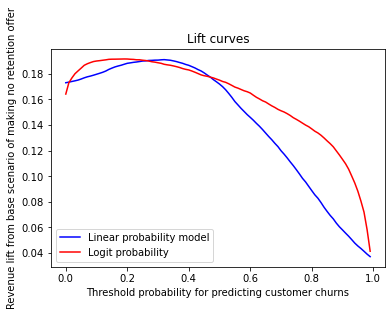

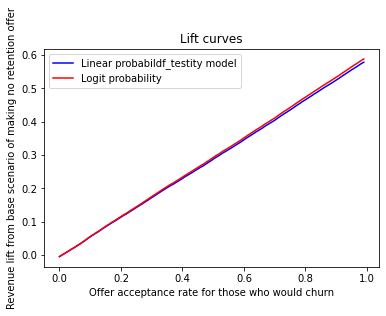

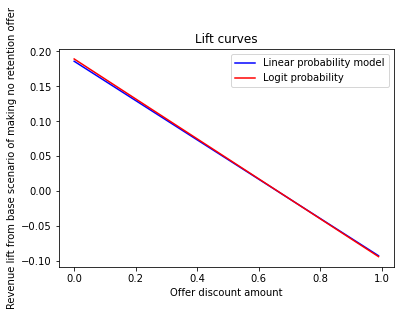

In [252]:
 # --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probabildf_testity model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [175]:
churn_df['discount'] = churn_df['discount_price'] / churn_df['monthly_price']

In [176]:
churn_df['discount'].value_counts()

0.953488    227096
0.985612       325
0.965517       167
0.950413        18
0.932773        12
0.922481         4
0.944954         2
1.000000         1
0.937984         1
0.954545         1
0.945312         1
Name: discount, dtype: int64

              subs       revenue lift_from_no_offer
no_offer     38962   184457.7966                0.0
logit_offer  46313  213989.88657           0.160102
lpm_offer    46190  213490.41792           0.157394


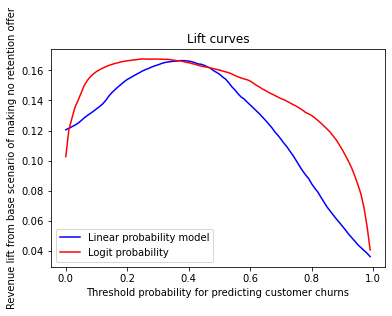

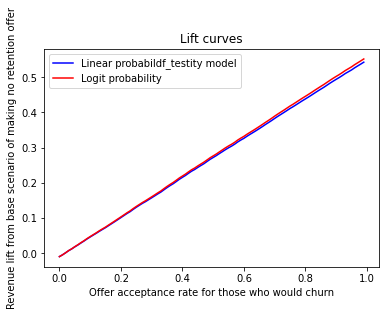

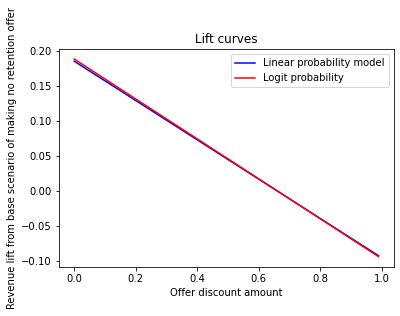

In [264]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = churn_df['monthly_price'].median()
discount_amount = 0.1
cases = ['no_offer', 'logit_offer', 'lpm_offer']
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
churn_df_test['random_draws'] = np.random.random(churn_df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(churn_df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind


# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind
 # --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probabildf_testity model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [270]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.4
threshold = 0.4
base_price = churn_df['monthly_price'].median()
discount_amount = 0.15
cases = ['no_offer', 'logit_offer', 'lpm_offer']
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
churn_df_test['random_draws'] = np.random.random(churn_df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(churn_df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind


# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind
 # --- plot lift curves
# Threshold sensitivity
# fig = plt.figure()
# ax1 = plt.gca()
# ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
# ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
# plt.title('Lift curves')
# plt.xlabel('Threshold probability for predicting customer churns')
# plt.ylabel('Revenue lift from base scenario of making no retention offer')
# plt.legend(labels=['Linear probability model', 'Logit probability'])

# # Acceptance rate sensitivity
# fig = plt.figure()
# ax1 = plt.gca()
# ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
# ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
# plt.title('Lift curves')
# plt.xlabel('Offer acceptance rate for those who would churn')
# plt.ylabel('Revenue lift from base scenario of making no retention offer')
# plt.legend(labels=['Linear probabildf_testity model', 'Logit probability'])

# # Discount amount sensitivity
# fig = plt.figure()
# ax1 = plt.gca()
# ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
# ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
# plt.title('Lift curves')
# plt.xlabel('Offer discount amount')
# plt.ylabel('Revenue lift from base scenario of making no retention offer')
# plt.legend(labels=['Linear probability model', 'Logit probability'])

              subs        revenue lift_from_no_offer
no_offer     38962    184457.7966                0.0
logit_offer  49229   221979.49125           0.203416
lpm_offer    49591  222029.438115           0.203687
